In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('mcdonalds.csv')

In [3]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [5]:
columns=df.columns
columns=columns[0:11]

In [6]:
for col in columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [7]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [8]:
data=df[columns]

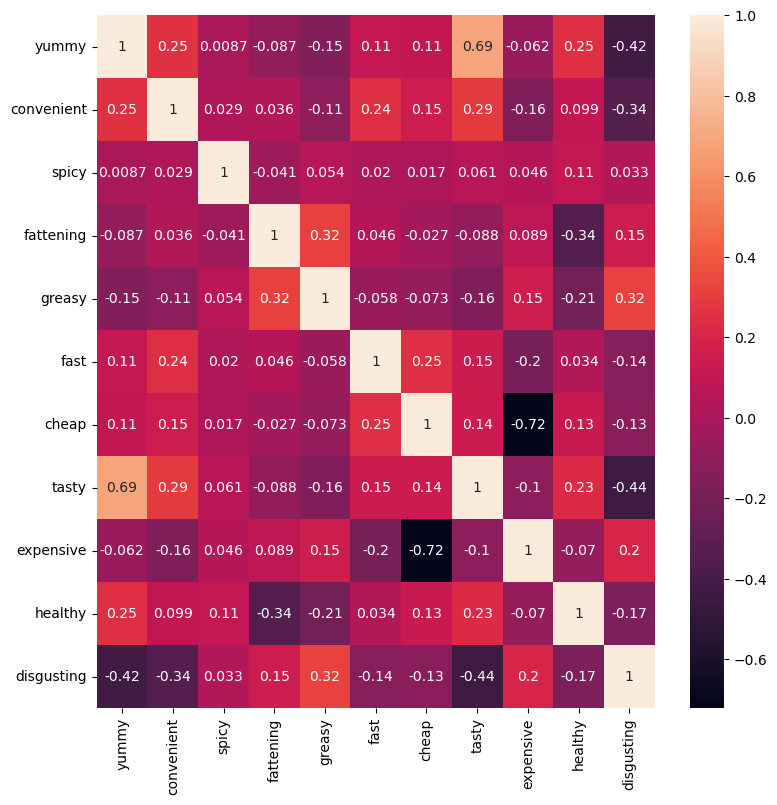

In [9]:
plt.figure(figsize=(9,9))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [10]:
from sklearn.decomposition import PCA

data_pca = PCA()
data_pca.fit(data)

# Standard deviation of each principal component
std_dev = np.sqrt(data_pca.explained_variance_)

# Proportion of variance explained by each principal component
prop_variance = data_pca.explained_variance_ratio_

# Cumulative proportion of variance explained
cumulative_prop_variance = np.cumsum(prop_variance)
index=[]

# Display the calculated values
for i in range(len(std_dev)):
    print(f"Principal Component {i+1}:")
    print(f"Standard Deviation: {std_dev[i]}")
    print(f"Proportion of Variance: {prop_variance[i]}")
    print(f"Cumulative Proportion: {cumulative_prop_variance[i]}\n")
    i = i + 1
    index.append("PC{}".format(i))

Principal Component 1:
Standard Deviation: 0.7570495217629885
Proportion of Variance: 0.2994472318789262
Cumulative Proportion: 0.2994472318789262

Principal Component 2:
Standard Deviation: 0.6074555644835018
Proportion of Variance: 0.19279721373248385
Cumulative Proportion: 0.49224444561141

Principal Component 3:
Standard Deviation: 0.5046194562131097
Proportion of Variance: 0.1330453518542039
Cumulative Proportion: 0.625289797465614

Principal Component 4:
Standard Deviation: 0.39879859313293264
Proportion of Variance: 0.08309577812565538
Cumulative Proportion: 0.7083855755912694

Principal Component 5:
Standard Deviation: 0.33740500948924196
Proportion of Variance: 0.059480522726587826
Cumulative Proportion: 0.7678660983178571

Principal Component 6:
Standard Deviation: 0.31027460902136506
Proportion of Variance: 0.050299561379929025
Cumulative Proportion: 0.8181656596977862

Principal Component 7:
Standard Deviation: 0.2896973207431503
Proportion of Variance: 0.04384909972678373


In [11]:
# Printing the standard deviation of the principal components
print("Standard Deviation:\n", std_dev.round(1))

# Calculating the factor loadings

load = (data_pca.components_)
i = 0

# Create a rotation matrix

rot_matrix = data_pca.components_.T

# The DataFrame will contain the factor loadings for each principal component,
rot_df = pd.DataFrame(rot_matrix, index=data.columns.values, columns=index)
rot_df = round(-rot_df, 3)

rot_df

#We can observe that the two segmentation variables with the highest factor
#loadings for PC2 are CHEAP and EXPENSIVE, indicating that this captures the
# price dimension, and the segmentation variables with highest loadings for
#PC1 are YUMMY nad DISGUSTING, indicating that this capture taste dimension
     

Standard Deviation:
 [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.477,-0.364,0.304,-0.055,0.308,-0.171,0.281,-0.013,-0.572,0.110,-0.045
convenient,0.155,-0.016,0.063,0.142,-0.278,0.348,0.060,0.113,0.018,0.666,0.542
spicy,0.006,-0.019,0.037,-0.198,-0.071,0.355,-0.708,-0.376,-0.400,0.076,-0.142
fattening,-0.116,0.034,0.322,0.354,0.073,0.407,0.386,-0.590,0.161,0.005,-0.251
greasy,-0.304,0.064,0.802,-0.254,-0.361,-0.209,-0.036,0.138,0.003,-0.009,-0.002
fast,0.108,0.087,0.065,0.097,-0.108,0.595,0.087,0.628,-0.166,-0.240,-0.339
cheap,0.337,0.611,0.149,-0.119,0.129,0.103,0.040,-0.140,-0.076,-0.428,0.489
tasty,0.472,-0.307,0.287,0.003,0.211,0.077,-0.360,0.073,0.639,-0.079,-0.020
expensive,-0.329,-0.601,-0.024,-0.068,0.003,0.261,0.068,-0.030,-0.067,-0.454,0.490
healthy,0.214,-0.077,-0.192,-0.763,-0.288,0.178,0.350,-0.176,0.186,0.038,-0.158


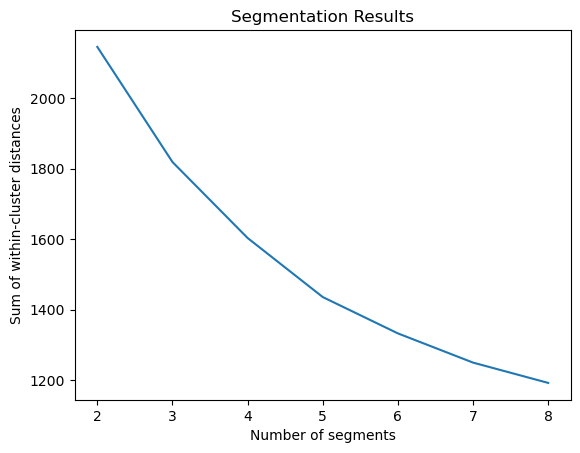

In [13]:
#elbow method to determine optimal number of clusters

from sklearn.cluster import KMeans
np.random.seed(1234)

nrep = 10
clusters=range(2,9)
wcss = []

MD_km28 = {}

for k in clusters:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(data)

    wcss.append(kmeans.inertia_)

    MD_km28[str(k)] = kmeans
    
plt.plot(clusters, wcss)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()


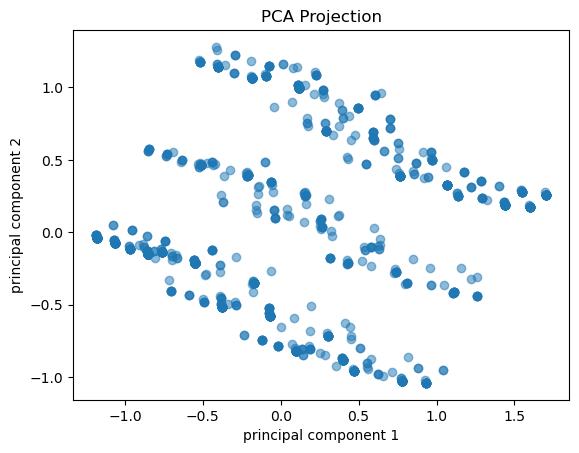

Projection Axes (Principal Components):
[[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]]


In [14]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# Plotting
plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.5)
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.title('PCA Projection')
plt.show()

# Getting the projection axes (PCs)
projection_axes = pca.components_
print("Projection Axes (Principal Components):")
print(projection_axes)

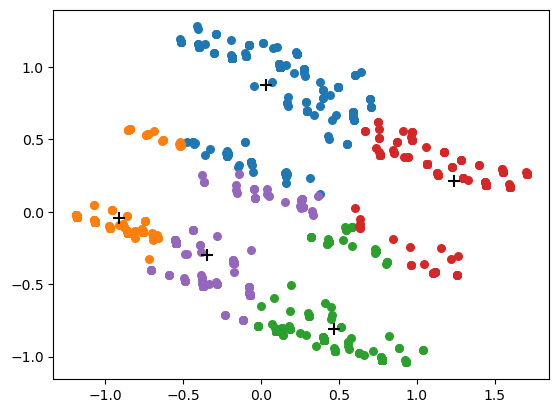

In [15]:
model=KMeans(n_clusters=5, n_init=nrep, random_state=1234)
y=model.fit_predict(data_pca)

 
#plotting the results:
 
for i in range(5):
    plt.scatter(data_pca[y == i , 0] , data_pca[y == i , 1] , label = i, s=30)
#plt.legend()

centroids = model.cluster_centers_
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k', marker='+')
plt.show()

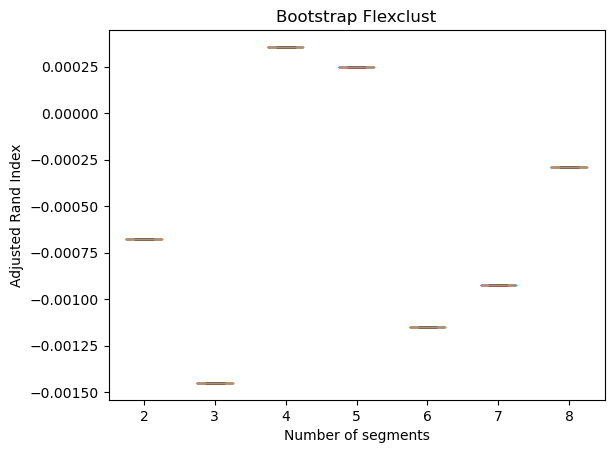

In [16]:
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
     
# Set the random seed
np.random.seed(1234)

# Set the number of bootstrap samples
nboot = 100

# Set the number of random initializations
nrep = 10
bootstrap_samples = []

# Create a loop to generate the bootstrap samples
for _ in range(nboot):
    bootstrap_sample = resample(data.values, random_state=1234)
    bootstrap_samples.append(bootstrap_sample)

## Create a list to store the adjusted Rand index scores
adjusted_rand_index = []
num_segments = range(2, 9)#number of segments

# Create a loop to calculate the adjusted Rand index scores for each number of segments
for k in num_segments:
    stability_scores = []

    # Create a loop to calculate the stability scores for each bootstrap sample
    for bootstrap_sample in bootstrap_samples:
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)

        # Fit the KMeans model to the bootstrap sample
        kmeans.fit(bootstrap_sample)

        #Predict the cluster labels for the bootstrap sample and origina data
        cluster_labels = kmeans.predict(bootstrap_sample)
        true_labels = kmeans.predict(data.values)

        # Calculate the adjusted Rand index score
        stability_score = adjusted_rand_score(true_labels, cluster_labels)
        stability_scores.append(stability_score)

    # Store the stability scores in the list
    adjusted_rand_index.append(stability_scores)

# Transpose the adjusted_rand_index list
adjusted_rand_index = np.array(adjusted_rand_index).T

# Creating global stablity plot
plt.boxplot(adjusted_rand_index, labels=num_segments, whis=10)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap Flexclust")
plt.show()